# section 1

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
'''
2.a Look at a few rows of the data to understand how it is structured.
'''
df = pd.read_csv('cigarette_sales.csv')

df.head()

,Age,HS,Income,Black,Female,Price,Sales
0,27.0,41.3,2948,26.2,51.7,42.7,89.8
1,22.9,66.7,4644,3.0,45.7,41.8,121.3
2,26.3,58.1,3665,3.0,50.8,38.5,115.2
3,29.1,39.9,2878,18.3,51.5,38.8,100.3
4,28.1,62.6,4493,7.0,50.8,39.7,123.0


In [4]:
'''
2.b Generate some summary statistics using describe().
'''
# Generate summary statistics
summary_stats = df.describe()
print(summary_stats)


             Age         HS       Income      Black     Female      Price  \
count  51.000000  51.000000    51.000000  51.000000  51.000000  51.000000   
mean   27.466667  53.149020  3763.705882   9.992157  50.950980  38.074510   
std     1.876983   8.001184   594.715639  12.648318   1.111463   4.128576   
min    22.900000  37.800000  2626.000000   0.200000  45.700000  29.000000   
25%    26.400000  48.300000  3271.000000   1.600000  50.750000  34.700000   
50%    27.400000  53.300000  3751.000000   6.000000  51.100000  38.900000   
75%    28.750000  59.100000  4116.500000  13.550000  51.500000  41.350000   
max    32.300000  67.300000  5079.000000  71.100000  53.500000  45.500000   

            Sales  
count   51.000000  
mean   121.541176  
std     32.070374  
min     65.500000  
25%    105.350000  
50%    119.000000  
75%    124.550000  
max    265.700000  


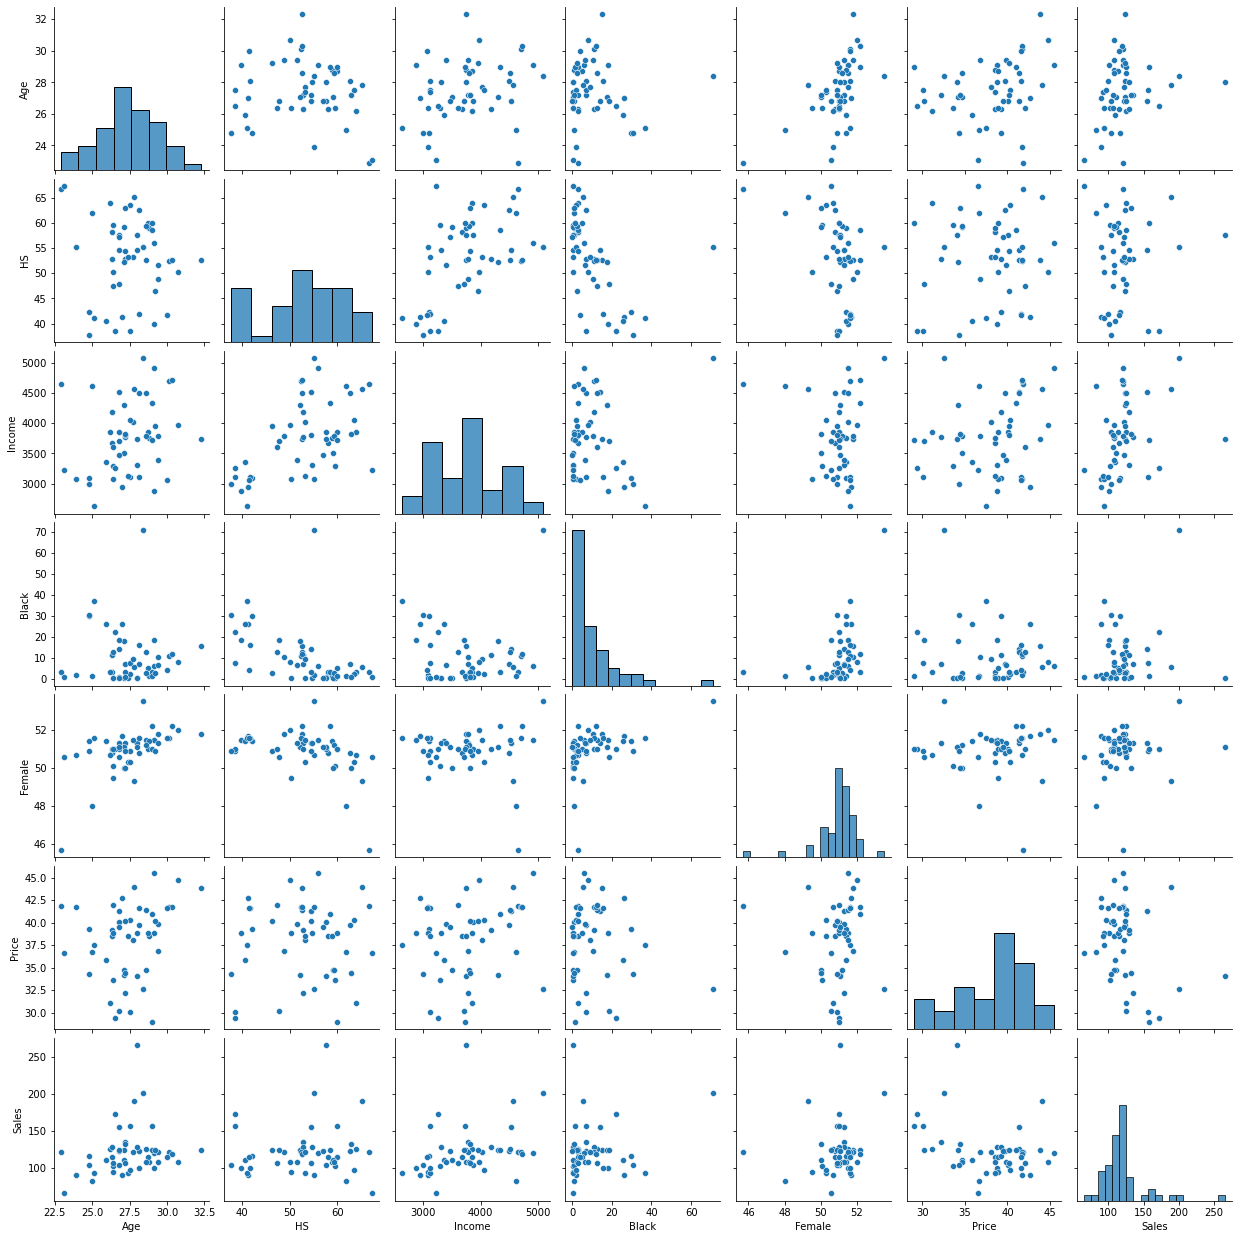

In [5]:
'''
2.c Look at the distributions and scatterplots of the data. A convenient function for doing this is 
pairplot() in Seaborn.
'''
sns.pairplot(df)
plt.show()

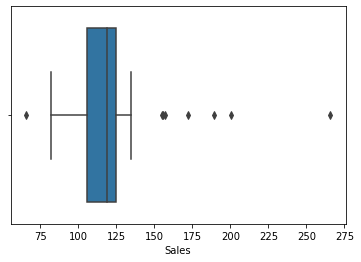

In [6]:
'''
2.e Generate a plot to check if there are outliers in the outcome. What do you see?
'''
sns.boxplot(x=df['Sales'])
plt.show()

In [7]:
'''
3.a Conduct a multiple regression analysis.
'''
y = df['Sales']
X = df[['Age', 'HS', 'Income', 'Black', 'Female', 'Price']]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     3.464
Date:                Thu, 28 Sep 2023   Prob (F-statistic):            0.00686
Time:                        18:53:54   Log-Likelihood:                -238.86
No. Observations:                  51   AIC:                             491.7
Df Residuals:                      44   BIC:                             505.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.3448    245.607      0.421      0.6

# section 2

In [8]:
'''
1. a Compute the VIF for each covariate and explain what the results mean. Use this link.
'''
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Sales ~ Age+ HS + Income + Black + Female + Price', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

vif

,VIF,variable
0,3875.756869,Intercept
1,2.300617,Age
2,2.676465,HS
3,2.325164,Income
4,2.392152,Black
5,2.406417,Female
6,1.142181,Price


In [9]:
'''
1. b Compute all the pairwise correlations between the variables. This link shows 3 ways to do this. 
Just use corr().
'''
correlations = df.corr()
print(correlations)

             Age        HS    Income     Black    Female     Price     Sales
Age     1.000000 -0.098916  0.256581 -0.040330  0.553032  0.247757  0.226555
HS     -0.098916  1.000000  0.534005 -0.501712 -0.417378  0.056975  0.066695
Income  0.256581  0.534005  1.000000  0.017288 -0.068827  0.214557  0.326068
Black  -0.040330 -0.501712  0.017288  1.000000  0.450900 -0.147776  0.189590
Female  0.553032 -0.417378 -0.068827  0.450900  1.000000  0.022474  0.146221
Price   0.247757  0.056975  0.214557 -0.147776  0.022474  1.000000 -0.300623
Sales   0.226555  0.066695  0.326068  0.189590  0.146221 -0.300623  1.000000


In [14]:
'''
1.c Remove the 3 variables with the highest p-values. Refit the model. How have the p-values for 
the other variables changed? Did R^2 change by much?
'''

X_reduced = X.drop(['HS', 'Female', 'Black'], axis=1)

# Fit the model with reduced predictors
model_new = sm.OLS(y, X_reduced).fit()
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     6.818
Date:                Thu, 28 Sep 2023   Prob (F-statistic):           0.000657
Time:                        19:20:15   Log-Likelihood:                -239.51
No. Observations:                  51   AIC:                             487.0
Df Residuals:                      47   BIC:                             494.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.2482     61.933      1.037      0.3

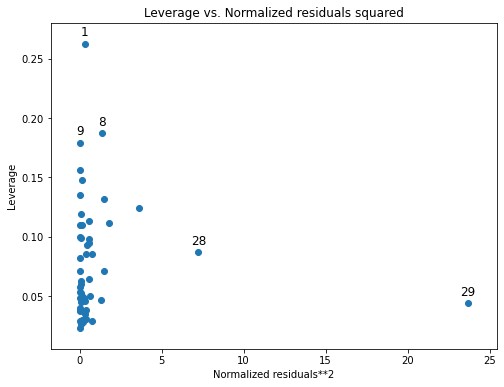

In [11]:
'''
3 Do a leverage plot. Are there influential outliers? Again, this resource is helpfu
'''
from statsmodels.graphics.regressionplots import plot_leverage_resid2

# Create a leverage plot
fig, ax = plt.subplots(figsize=(8, 6))
plot_leverage_resid2(model_reduced, ax=ax)
plt.show()


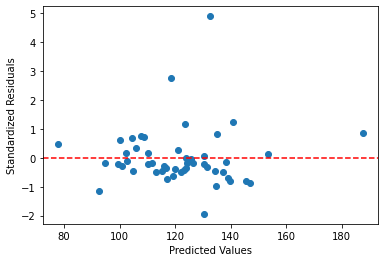

In [12]:
'''
4.a Generate a predicted vs standardized residual plot. The resid_studentized_internal in
statsmodels are the standardized residuals. The link above shows how to obtain them. Does 
the data meet the linearity assumption?
'''
# Access standardized residuals
standardized_residuals = model.get_influence().resid_studentized_internal

# Create a predicted vs. standardized residual plot
plt.scatter(model.fittedvalues, standardized_residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Standardized Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


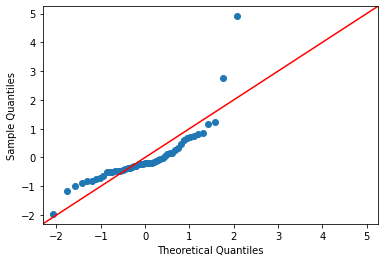

In [13]:
'''
5.a Do a Q-Q Plot of the residuals. Are the residuals normally distributed
'''
from statsmodels.graphics.gofplots import qqplot

# Create a Q-Q plot of residuals
qqplot(standardized_residuals, line='45', fit=True)
plt.show()
